In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#import os




In [2]:
with open ('./eval_results/gen_result_pred_target_run6.json' , "r") as f:
    results = json.load(f)

results[10]

[{'role': 'system',
  'content': 'You are an radio transcript message transcript assisant, please classifer the following message'},
 {'role': 'user', 'content': ' I got a little bit maybe fast if anything'},
 {'role': 'target assiant', 'content': 'General Spotting'},
 {'role': 'assiant', 'content': 'Vehicle handling'}]

In [3]:
# function to tranfer the list into the 
def result_json_to_df(json_list):
    # create an empty dataframe
    df = pd.DataFrame()
    
    # loop though all the json list to put it into an dataframe 
    for index, content in enumerate(json_list):
        
        temp_dict = {}
        
        # put every role and content into an list
        for c_index, message in enumerate(content):
            
            temp_dict[message['role']] = message['content']
            
            #temp_list.append(temp_dict)
            
        # the single framce
        info_df = pd.DataFrame([temp_dict])
        
        # append single dataframe into overall dataframe
        df = pd.concat([df, info_df])
        
    
    return df
        
        
        

In [4]:
df = result_json_to_df(results)
df = df.reset_index()
df.tail()

,index,system,user,target assiant,assiant
971,0,You are an radio transcript message transcript...,Zero point zero zero zero zero. Amazing.,General Spotting,General Spotting
972,0,You are an radio transcript message transcript...,Amazing. Hell of a job Larson. You just got t...,General Spotting,General Spotting
973,0,You are an radio transcript message transcript...,down low right here. Just said it was the fiv...,General Spotting,General Spotting
974,0,You are an radio transcript message transcript...,Larson.,General Spotting,General Spotting
975,0,You are an radio transcript message transcript...,They said it twice. You are the winner. You j...,General Spotting,General Spotting


In [5]:
# compare two columns and generate the result
def compare(row):
    
    truth = row['target assiant'] == row['assiant']
    return truth
    
df['compare'] = df.apply(compare, axis = 1)
    
# print the tail of the dataframe
df.tail()
    

,index,system,user,target assiant,assiant,compare
971,0,You are an radio transcript message transcript...,Zero point zero zero zero zero. Amazing.,General Spotting,General Spotting,True
972,0,You are an radio transcript message transcript...,Amazing. Hell of a job Larson. You just got t...,General Spotting,General Spotting,True
973,0,You are an radio transcript message transcript...,down low right here. Just said it was the fiv...,General Spotting,General Spotting,True
974,0,You are an radio transcript message transcript...,Larson.,General Spotting,General Spotting,True
975,0,You are an radio transcript message transcript...,They said it twice. You are the winner. You j...,General Spotting,General Spotting,True


In [6]:
labels = df['target assiant'].value_counts().index.to_list()
print(labels)

['General Spotting', 'Pit Strategy', 'Vehicle handling', 'Track Info', 'Spotting Racecraft', 'Vehicle Status', 'Race Start']


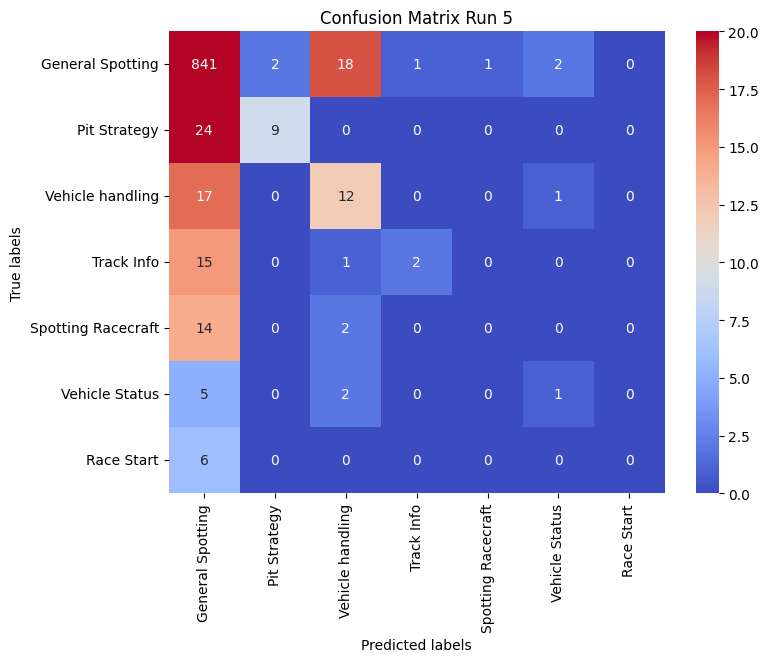

In [7]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(df['target assiant'], df['assiant'], labels=labels)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels, vmax = 20)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Run 5')
#plt.savefig('./eval_results/report/run5.png', pad_inches = 0.5 , bbox_inches = 'tight')
plt.show()



In [8]:
from sklearn import metrics

#report = 
print(metrics.classification_report(df['target assiant'], df['assiant'], labels=labels))

print("Accuracy : ",  metrics.accuracy_score(df['target assiant'], df['assiant']))

#with open('./eval_results/report/Run5.txt' , 'w') as file:
 #   file.write(report)
    
    


                    precision    recall  f1-score   support

  General Spotting       0.91      0.97      0.94       865
      Pit Strategy       0.82      0.27      0.41        33
  Vehicle handling       0.34      0.40      0.37        30
        Track Info       0.67      0.11      0.19        18
Spotting Racecraft       0.00      0.00      0.00        16
    Vehicle Status       0.25      0.12      0.17         8
        Race Start       0.00      0.00      0.00         6

          accuracy                           0.89       976
         macro avg       0.43      0.27      0.30       976
      weighted avg       0.86      0.89      0.86       976

Accuracy :  0.8862704918032787


C:\Users\tchen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tchen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tchen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,